In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

### Acidente ambiental

13755 rows × 70 columns

In [2]:
df_acidentes = pd.read_csv('http://siscom.ibama.gov.br/geoserver/publica/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=publica:adm_comunicacidente_p&outputFormat=csv')

<ipython-input-2-9d676d2329ca>:1: DtypeWarning: Columns (11,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_acidentes = pd.read_csv('http://siscom.ibama.gov.br/geoserver/publica/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=publica:adm_comunicacidente_p&outputFormat=csv')


In [3]:
df_acidentes.head()

,FID,uuid,id_ocorrencia,id_municipio,id_uf,id_responsavel,des_complemento_tipo_localizaca,des_complemento_tipo_evento,des_complemento_instituicao_atu,des_complemento_tipo_dano_ident,...,dia_semana_primeira_obs,dia_semana_registro,institiuicoes_atuando_local,tipos_fontes_informacoes,tipos_danos_identificados,produtos_onu,produtos_outro,geom,dt_carga,feicao_proxima
0,adm_comunicacidente_p.fid-4ef88078_191f52eb1f7...,9d1f1f3a-0840-4de9-9019-f3a8cec09a72,312,2706901.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros;Polícia Rodoviária,Mídia,Óbitos/feridos,NaN,NaN,POINT (-35.9511275 -9.6016711),2023-05-21T20:44:35,NaN
1,adm_comunicacidente_p.fid-4ef88078_191f52eb1f7...,9e1b47f8-72de-4db9-aeb2-ffc7fd52b306,313,3205309.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros,Mídia,Outro(s),NaN,NaN,POINT (-40.3016327 -20.2996826),2023-05-21T20:44:35,NaN
2,adm_comunicacidente_p.fid-4ef88078_191f52eb1f7...,7404e435-94ec-4f3a-b46d-409b0bd9b310,314,5003702.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outra(s),Mídia,Fauna;Flora;População afetada/evacuada;Rio/cór...,NaN,NaN,POINT (-54.812208 -22.2206145),2023-05-21T20:44:35,NaN
3,adm_comunicacidente_p.fid-4ef88078_191f52eb1f7...,e6338a4d-cdc1-4bde-b037-366019617cc6,315,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros;Defesa Civil,Mídia,Solo,NaN,NaN,POINT (-47.9768478 -15.82326),2023-05-21T20:44:35,NaN
4,adm_comunicacidente_p.fid-4ef88078_191f52eb1f7...,f1085ea1-6007-466d-a850-77d5023ad819,316,4312054.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outra(s),Mídia,Rio/córrego;Solo,NaN,NaN,POINT (-52.097268 -29.331113),2023-05-21T20:44:35,NaN


### Remoção de dados nulos

Abaixo podemos ver a lista de todas as colunas do dataset inicial.

In [4]:
df_acidentes.columns

Index(['FID', 'uuid', 'id_ocorrencia', 'id_municipio', 'id_uf',
       'id_responsavel', 'des_complemento_tipo_localizaca',
       'des_complemento_tipo_evento', 'des_complemento_instituicao_atu',
       'des_complemento_tipo_dano_ident', 'des_danos', 'des_ocorrencia',
       'dt_ocorrencia', 'hr_ocorrencia', 'dt_registro',
       'des_informacoes_adicionais', 'plano_emergencia',
       'plano_emergencia_acionado', 'iniciados_outras_providencias',
       'des_outras_providencias', 'ocorrencia_oleo', 'dt_primeira_obs',
       'hr_primeira_obs', 'informacao_geografica', 'informacao_responsavel',
       'acao_inicial_tomada', 'des_causa_provavel', 'situacao_atual_descarga',
       'nro_ocorrencia', 'endereco_ocorrencia', 'nome_instituicao_atuando',
       'telefone_instituicao_atuando', 'tipo_substancia', 'volume_estimado',
       'produto_nao_se_aplica', 'produto_perigoso', 'produto_nao_especificado',
       'id_bacia_sedimentar', 'legado', 'des_instituicao_empresa',
       'nome_comunic

Inicialmente, apagamos as colunas que possuem mais de 7000 valores nulos, bem como colunas que possuem informações omitidas pela lei de proteção de dados, informações redundantes ou informações que podem ser obtidas por meio de outras colunas.

Podemos ver também a lista de todas as colunas iniciais que possuem valores nulos, e a quantidade desses valores

In [5]:
lista_nan = df_acidentes.columns[df_acidentes.isna().any()].tolist()
for i in lista_nan:
  quantidade_nan = df_acidentes[i].isna().sum()
  print(i, ':', quantidade_nan)
  if quantidade_nan > 7000:
    df_acidentes = df_acidentes.drop(columns=[i])

df_acidentes = df_acidentes.drop(columns=["id_responsavel", "cpf_contato", "id_municipio", "id_uf", "informacao_geografica", "ip_contato",
                                          "nro_ocorrencia", "nome_comunicante", "dt_carga", "telefone_contato", "des_funcao_comunicante",
                                          "email_comunicante", "FID", "uuid", "id_ocorrencia"])

id_municipio : 2688
id_uf : 919
id_responsavel : 6745
des_complemento_tipo_localizaca : 9399
des_complemento_tipo_evento : 9506
des_complemento_instituicao_atu : 8609
des_complemento_tipo_dano_ident : 10131
des_danos : 13755
des_ocorrencia : 7980
dt_ocorrencia : 6197
hr_ocorrencia : 645
des_informacoes_adicionais : 13755
plano_emergencia : 6581
des_outras_providencias : 8328
dt_primeira_obs : 6035
hr_primeira_obs : 6106
informacao_geografica : 6894
acao_inicial_tomada : 13755
des_causa_provavel : 6440
situacao_atual_descarga : 11127
endereco_ocorrencia : 6299
nome_instituicao_atuando : 12064
telefone_instituicao_atuando : 12261
tipo_substancia : 12052
volume_estimado : 12212
produto_nao_se_aplica : 12283
produto_perigoso : 11650
produto_nao_especificado : 12523
id_bacia_sedimentar : 11464
des_instituicao_empresa : 6620
des_obs : 7384
cpf_contato : 5798
tipo_comunicado : 6861
periodo_ocorrencia : 793
periodo_primeira_obs : 6269
municipio : 2883
uf : 953
bacia_sedimentar : 11464
origem :

Após a exclusão de algumas colunas, podemos ver a lista de colunas resultantes que possuem valores nulos e a quantidade desses valores em cada coluna.

In [6]:
lista_nan = df_acidentes.columns[df_acidentes.isna().any()].tolist()
for i in lista_nan:
  quantidade_nan = df_acidentes[i].isna().sum()
  print(i, ':', quantidade_nan)

dt_ocorrencia : 6197
hr_ocorrencia : 645
plano_emergencia : 6581
dt_primeira_obs : 6035
hr_primeira_obs : 6106
des_causa_provavel : 6440
endereco_ocorrencia : 6299
des_instituicao_empresa : 6620
tipo_comunicado : 6861
periodo_ocorrencia : 793
periodo_primeira_obs : 6269
municipio : 2883
uf : 953
origem : 173
tipo_evento : 145
dt_ocorrencia_feriado : 5796
institiuicoes_atuando_local : 1659
tipos_fontes_informacoes : 343
tipos_danos_identificados : 941


Abaixo vemos a lista de colunas presentes no dataset após a limpeza inicial.

In [7]:
df_acidentes.columns

Index(['dt_ocorrencia', 'hr_ocorrencia', 'dt_registro', 'plano_emergencia',
       'plano_emergencia_acionado', 'iniciados_outras_providencias',
       'ocorrencia_oleo', 'dt_primeira_obs', 'hr_primeira_obs',
       'informacao_responsavel', 'des_causa_provavel', 'endereco_ocorrencia',
       'legado', 'des_instituicao_empresa', 'validado', 'tipo_comunicado',
       'periodo_ocorrencia', 'periodo_primeira_obs', 'municipio', 'uf',
       'origem', 'tipo_evento', 'dt_ocorrencia_feriado',
       'institiuicoes_atuando_local', 'tipos_fontes_informacoes',
       'tipos_danos_identificados', 'geom'],
      dtype='object')

### Tratamento dos dados de data e hora

Antes de processar os dados de data/hora, devemos nos atentar a casos de registros errados. Abaixo vemos alguns exemplos de datas em que o ano começa com o número 0, o que provavelmente foi causado por falha humana no momento do registro.

In [8]:
test = df_acidentes['dt_ocorrencia'].to_list()
for i in test:
  if type(i) == str:
    if i[0] == '1' or i[0] == '0' or i == '2201-02-16':
      print(i)


2201-02-16
0206-06-03
0016-06-22
0201-01-28
0201-07-14
0201-11-28
0201-11-29
1015-12-20
0202-11-02
0222-02-09
0202-09-22
0202-02-13
0202-04-09


Quando olhamos para essa observação específica, podemos ver qual seria o ano correto ao observar a coluna "dt_registro", que aparenta ser uma coluna preenchida automaticamente pelo sistema

In [9]:
df_acidentes.loc[df_acidentes['dt_ocorrencia'] == '0206-06-03']

,dt_ocorrencia,hr_ocorrencia,dt_registro,plano_emergencia,plano_emergencia_acionado,iniciados_outras_providencias,ocorrencia_oleo,dt_primeira_obs,hr_primeira_obs,informacao_responsavel,...,periodo_primeira_obs,municipio,uf,origem,tipo_evento,dt_ocorrencia_feriado,institiuicoes_atuando_local,tipos_fontes_informacoes,tipos_danos_identificados,geom
6616,0206-06-03,03:03,2016-06-06 08:15:58,S,N,S,S,2016-06-03,03:03,T,...,S,Macaé,RJ,Embarcação,Derramamento de líquidos,f,Outra(s),Comunicado da empresa/responsável,Mar,POINT (-40.02866111111111 -22.564902777777778)


Assim, após uma investigação aprofundada, achamos todos os registros com erros e substituímos pelo formato adequado, tanto para a coluna "dt_ocorrencia" quanto para a coluna "dt_primeira_obs"

In [10]:
df_acidentes = df_acidentes.replace('2201-02-16', '2016-02-16')
df_acidentes = df_acidentes.replace('0206-06-03', '2016-06-03')
df_acidentes = df_acidentes.replace('0016-06-22', '2016-06-22')
df_acidentes = df_acidentes.replace('0201-01-28', '2018-01-28')
df_acidentes = df_acidentes.replace('0201-07-14', '2018-07-14')
df_acidentes = df_acidentes.replace('0201-11-28', '2019-11-28')
df_acidentes = df_acidentes.replace('0201-11-29', '2019-11-29')
df_acidentes = df_acidentes.replace('0202-11-02', '2020-11-02')
df_acidentes = df_acidentes.replace('0222-02-09', '2022-02-09')
df_acidentes = df_acidentes.replace('0202-09-22', '2022-09-22')
df_acidentes = df_acidentes.replace('0202-02-13', '2023-02-13')
df_acidentes = df_acidentes.replace('0202-04-09', '2023-04-09')
df_acidentes = df_acidentes.replace('1015-12-20', '2015-12-20')

In [11]:
df_acidentes = df_acidentes.replace('0216-08-28', '2016-08-28')
df_acidentes = df_acidentes.replace('0216-10-15', '2016-10-15')
df_acidentes = df_acidentes.replace('0202-05-22', '2021-05-22')
df_acidentes = df_acidentes.replace('0202-01-06', '2023-01-06')
df_acidentes = df_acidentes.replace('0202-04-10', '2023-04-10')

O registro com formatação errada não exite mais na base

In [12]:
df_acidentes.loc[df_acidentes['dt_primeira_obs'] == '0202-04-10']

,dt_ocorrencia,hr_ocorrencia,dt_registro,plano_emergencia,plano_emergencia_acionado,iniciados_outras_providencias,ocorrencia_oleo,dt_primeira_obs,hr_primeira_obs,informacao_responsavel,...,periodo_primeira_obs,municipio,uf,origem,tipo_evento,dt_ocorrencia_feriado,institiuicoes_atuando_local,tipos_fontes_informacoes,tipos_danos_identificados,geom


In [13]:
df_acidentes['dt_ocorrencia']

,dt_ocorrencia
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
13750,2023-05-18
13751,2023-05-16
13752,2023-05-15
13753,2023-05-17


Agora podemos transformar as colunas de data no formato date_time para melhor manipulação e investigação dos dados

In [14]:
df_acidentes['dt_ocorrencia_mod'] = pd.to_datetime(df_acidentes['dt_ocorrencia'])
df_acidentes['dt_registro_mod'] = pd.to_datetime(df_acidentes['dt_registro'])
df_acidentes['dt_primeira_obs_mod'] = pd.to_datetime(df_acidentes['dt_primeira_obs'])
df_acidentes['registro_ano'] = df_acidentes['dt_registro_mod'].dt.year

Algo parecido ocorreu com as colunas de hora. Primeiramente, os valores em branco não estavam preenchidos com 'NaN', como em outras colunas do dataset, mas sim com uma string "NULL ", o que dificultou inicialmente o tratamento dos dados. Após identificado esse erro, todas as colunas com valor nulo foram preenchidas com NaN para melhor manuseio dos dados

In [15]:
df_acidentes['hr_ocorrencia'].head()

,hr_ocorrencia
0,NULL
1,00:00
2,NULL
3,NULL
4,NULL


In [16]:
df_acidentes = df_acidentes.replace('NULL ', float('nan'))

Além disso, foram identificadas diversas strings com erros nas colunas. Desta vez, como não existe outra coluna de referência para modificar os erros, esses valores foram substituídos por "NaN".

In [17]:
df_acidentes = df_acidentes.replace('     ', float('nan'))
df_acidentes = df_acidentes.replace('10:  ', float('nan'))
df_acidentes = df_acidentes.replace('02   ', float('nan'))
df_acidentes = df_acidentes.replace('5    ', float('nan'))
df_acidentes = df_acidentes.replace('13   ', float('nan'))
df_acidentes = df_acidentes.replace(':    ', float('nan'))
df_acidentes = df_acidentes.replace('03:  ', float('nan'))
df_acidentes = df_acidentes.replace('  :  ', float('nan'))
df_acidentes = df_acidentes.replace('8    ', float('nan'))
df_acidentes = df_acidentes.replace('20:0 ', float('nan'))
df_acidentes = df_acidentes.replace('7    ', float('nan'))
df_acidentes = df_acidentes.replace('09   ', float('nan'))
df_acidentes = df_acidentes.replace('9    ', float('nan'))
df_acidentes = df_acidentes.replace('13:0 ', float('nan'))
df_acidentes = df_acidentes.replace('14   ', float('nan'))
df_acidentes = df_acidentes.replace('0    ', float('nan'))
df_acidentes = df_acidentes.replace('21:h ', float('nan'))
df_acidentes = df_acidentes.replace('16:/0', float('nan'))


In [18]:
df_acidentes['hr_ocorrencia'].head()

,hr_ocorrencia
0,NaN
1,00:00
2,NaN
3,NaN
4,NaN


O mesmo tratamento foi feito para a coluna "hr_primeira_obs"

In [19]:
df_acidentes['hr_primeira_obs']

,hr_primeira_obs
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
13750,09:22
13751,16:23
13752,22:56
13753,09:55


In [20]:
df_acidentes = df_acidentes.replace('9:00 ', float('nan'))
df_acidentes = df_acidentes.replace('4    ', float('nan'))
df_acidentes = df_acidentes.replace('10:0 ', float('nan'))
df_acidentes = df_acidentes.replace('12   ', float('nan'))
df_acidentes = df_acidentes.replace('14:h ', float('nan'))


Após a limpeza, ambas as colunas foram convertidas para o tipo datetime

In [21]:
df_acidentes['hr_primeira_obs_mod'] = pd.to_datetime(df_acidentes['hr_primeira_obs'])
df_acidentes['hr_primeira_obs_mod'] = df_acidentes['hr_primeira_obs_mod'].dt.time

df_acidentes['hr_ocorrencia_mod'] = pd.to_datetime(df_acidentes['hr_ocorrencia'])
df_acidentes['hr_ocorrencia_mod'] = df_acidentes['hr_ocorrencia_mod'].dt.time


<ipython-input-21-91fbc143c283>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_acidentes['hr_primeira_obs_mod'] = pd.to_datetime(df_acidentes['hr_primeira_obs'])
<ipython-input-21-91fbc143c283>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_acidentes['hr_ocorrencia_mod'] = pd.to_datetime(df_acidentes['hr_ocorrencia'])


In [22]:
df_acidentes['hr_ocorrencia_mod']

,hr_ocorrencia_mod
0,NaT
1,00:00:00
2,NaT
3,NaT
4,NaT
...,...
13750,09:22:00
13751,17:10:00
13752,22:56:00
13753,09:55:00


In [23]:
df_acidentes['hr_primeira_obs']

,hr_primeira_obs
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
13750,09:22
13751,16:23
13752,22:56
13753,09:55


Foram encontrados também casos em que a diferença entre a dataa de registro e a data da primeira observação é negativa, ou seja, a observação ocorreu depois do registro, o que não é possível. Nestes casos, provavelmente houve um erro na digitação da data de observação e, por isso, o valor foi transformado em NaN.

In [24]:
for i in range(len(df_acidentes)):
  if (type(df_acidentes['dt_primeira_obs_mod'][i])!= pd._libs.tslibs.nattype.NaTType) and (type(df_acidentes['dt_registro_mod'][i])!= pd._libs.tslibs.nattype.NaTType):
    dif = df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_primeira_obs_mod'][i]
    if(dif.days < 0):
      print("data ocorrência:", df_acidentes['dt_ocorrencia_mod'][i],"\ndata obs:", df_acidentes['dt_primeira_obs_mod'][i], "\ndata registro:", df_acidentes['dt_registro_mod'][i], "\ndiferença em dias:", df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_primeira_obs_mod'][i], "\n\n")

      df_acidentes.loc[i, 'dt_primeira_obs_mod'] = float('nan')
      df_acidentes.loc[i, 'dt_primeira_obs'] = float('nan')

data ocorrência: 2014-10-20 00:00:00 
data obs: 2015-12-20 00:00:00 
data registro: 2015-09-02 11:09:35 
diferença em dias: -109 days +11:09:35 


data ocorrência: 2018-06-01 00:00:00 
data obs: 2018-06-01 00:00:00 
data registro: 2018-02-01 16:16:10 
diferença em dias: -120 days +16:16:10 


data ocorrência: 2018-06-01 00:00:00 
data obs: 2018-06-01 00:00:00 
data registro: 2018-02-01 16:16:10 
diferença em dias: -120 days +16:16:10 


data ocorrência: 2021-06-29 00:00:00 
data obs: 2021-06-29 00:00:00 
data registro: 2021-06-09 11:23:34 
diferença em dias: -20 days +11:23:34 




O mesmo processo foi realizado na verificação de diferença entre registro e ocorrência.

In [25]:
for i in range(len(df_acidentes)):
  if (type(df_acidentes['dt_ocorrencia_mod'][i])!= pd._libs.tslibs.nattype.NaTType) and (type(df_acidentes['dt_registro_mod'][i])!= pd._libs.tslibs.nattype.NaTType):
    dif = df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_ocorrencia_mod'][i]
    if(dif.days < 0):
      print("data ocorrência:", df_acidentes['dt_ocorrencia_mod'][i],"\ndata obs:", df_acidentes['dt_primeira_obs_mod'][i], "\ndata registro:", df_acidentes['dt_registro_mod'][i], "\ndiferença em dias:", df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_ocorrencia_mod'][i], "\n\n")

      df_acidentes.loc[i, 'dt_ocorrencia_mod'] = float('nan')
      df_acidentes.loc[i, 'dt_ocorrencia'] = float('nan')


data ocorrência: 2016-09-06 00:00:00 
data obs: 2016-02-06 00:00:00 
data registro: 2016-02-29 14:58:51 
diferença em dias: -190 days +14:58:51 


data ocorrência: 2018-06-01 00:00:00 
data obs: NaT 
data registro: 2018-02-01 16:16:10 
diferença em dias: -120 days +16:16:10 


data ocorrência: 2018-06-01 00:00:00 
data obs: NaT 
data registro: 2018-02-01 16:16:10 
diferença em dias: -120 days +16:16:10 


data ocorrência: 2021-06-29 00:00:00 
data obs: NaT 
data registro: 2021-06-09 11:23:34 
diferença em dias: -20 days +11:23:34 




Após limpeza inicial: 33 colunas

In [26]:
df_acidentes.columns

Index(['dt_ocorrencia', 'hr_ocorrencia', 'dt_registro', 'plano_emergencia',
       'plano_emergencia_acionado', 'iniciados_outras_providencias',
       'ocorrencia_oleo', 'dt_primeira_obs', 'hr_primeira_obs',
       'informacao_responsavel', 'des_causa_provavel', 'endereco_ocorrencia',
       'legado', 'des_instituicao_empresa', 'validado', 'tipo_comunicado',
       'periodo_ocorrencia', 'periodo_primeira_obs', 'municipio', 'uf',
       'origem', 'tipo_evento', 'dt_ocorrencia_feriado',
       'institiuicoes_atuando_local', 'tipos_fontes_informacoes',
       'tipos_danos_identificados', 'geom', 'dt_ocorrencia_mod',
       'dt_registro_mod', 'dt_primeira_obs_mod', 'registro_ano',
       'hr_primeira_obs_mod', 'hr_ocorrencia_mod'],
      dtype='object')

Após esse tratamento, podemos visualizar melhor a distribuição do número de dias entre a observação e o registro do acidente. Abaixo vemos essa distribuição considerando todos os casos.

In [29]:
day_count_dif = []

for i in range(len(df_acidentes)):
  if (type(df_acidentes['dt_primeira_obs_mod'][i])!= pd._libs.tslibs.nattype.NaTType) and (type(df_acidentes['dt_registro_mod'][i])!= pd._libs.tslibs.nattype.NaTType):
    dif = df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_primeira_obs_mod'][i]
    day_count_dif.append((df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_primeira_obs_mod'][i]).days)

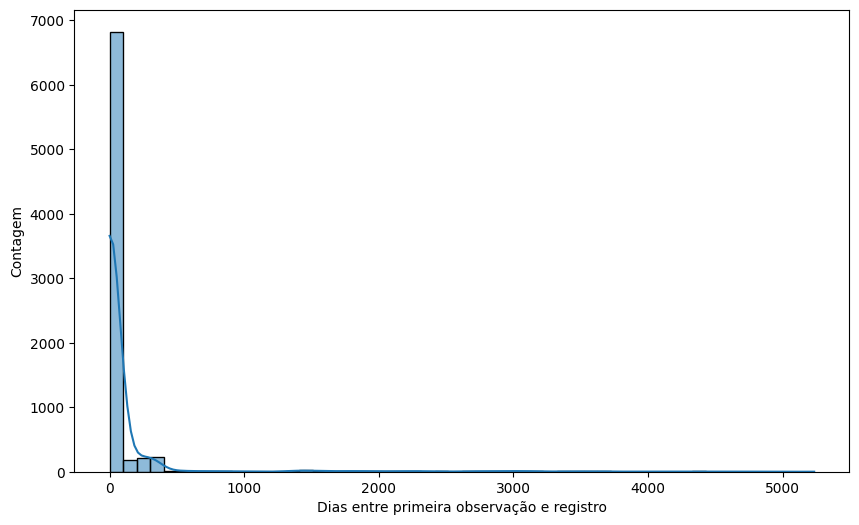

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data=day_count_dif, binwidth=100, kde=True)
plt.xlabel("Dias entre primeira observação e registro")
plt.ylabel("Contagem")
plt.show()

É possível notar que existe uma minoria de casos em que a diferença entre as datas se extendem além de 5000 dias (mais de 13 anos). Não sabemos se isso se trata de um erro de registro ou um dado verdadeiro, mas podemos conferir esses números mais de perto.

Abaixo separamos os dados entre aqueles que têm diferença entre as datas superior a 365 dias e os que tem diferença inferior a esse valor.

In [46]:
long_day_count_dif = []
short_day_count_dif = []

for i in range(len(df_acidentes)):
  if (type(df_acidentes['dt_primeira_obs_mod'][i])!= pd._libs.tslibs.nattype.NaTType) and (type(df_acidentes['dt_registro_mod'][i])!= pd._libs.tslibs.nattype.NaTType):
    dif = df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_primeira_obs_mod'][i]
    if(dif.days > 365):
      long_day_count_dif.append((df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_primeira_obs_mod'][i]).days)
      print("data ocorrência:", df_acidentes['dt_ocorrencia_mod'][i],"\ndata obs:", df_acidentes['dt_primeira_obs_mod'][i], "\ndata registro:", df_acidentes['dt_registro_mod'][i], "\ndiferença em dias:", df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_primeira_obs_mod'][i], "\n\n")
    else:
      short_day_count_dif.append((df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_primeira_obs_mod'][i]).days)


data ocorrência: NaT 
data obs: 2009-08-01 00:00:00 
data registro: 2021-08-20 11:40:42 
diferença em dias: 4402 days 11:40:42 


data ocorrência: NaT 
data obs: 2009-08-27 00:00:00 
data registro: 2021-08-20 11:48:42 
diferença em dias: 4376 days 11:48:42 


data ocorrência: NaT 
data obs: 2009-10-01 00:00:00 
data registro: 2021-08-20 11:54:59 
diferença em dias: 4341 days 11:54:59 


data ocorrência: NaT 
data obs: 2009-12-04 00:00:00 
data registro: 2021-08-20 12:16:19 
diferença em dias: 4277 days 12:16:19 


data ocorrência: 2013-09-30 00:00:00 
data obs: 2013-09-30 00:00:00 
data registro: 2015-11-16 16:46:55 
diferença em dias: 777 days 16:46:55 


data ocorrência: 2014-10-22 00:00:00 
data obs: 2014-10-22 00:00:00 
data registro: 2015-11-17 16:12:59 
diferença em dias: 391 days 16:12:59 


data ocorrência: 2014-07-05 00:00:00 
data obs: 2014-07-05 00:00:00 
data registro: 2016-01-13 15:30:11 
diferença em dias: 557 days 15:30:11 


data ocorrência: 2014-07-05 00:00:00 
data ob

São, ao todo, 281 observações em que a diferença entre as datas ultrapassa um ano. A maior contagem de dias entre observação e registro é 5235 dias. Abaixo temos um histograma com a distribuição dos valores desses casos.

In [47]:
len(long_day_count_dif)

281

In [48]:
max(long_day_count_dif)

5235

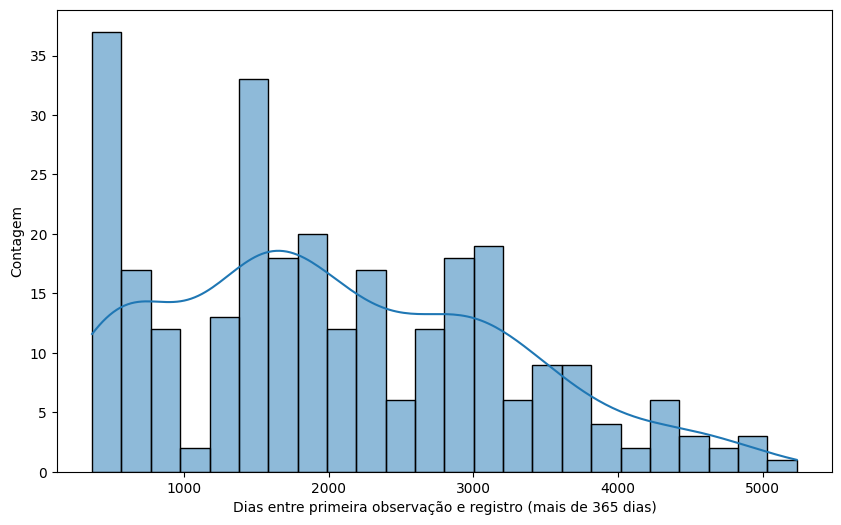

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(data=long_day_count_dif, binwidth=200, kde=True)
plt.xlabel("Dias entre primeira observação e registro (mais de 365 dias)")
plt.ylabel("Contagem")
plt.show()

Os casos em que a diferença de datas é menor ou igual a 365 dias somam 7435 observações.

In [38]:
len(short_day_count_dif)

7435

Podemos também olhar mais de perto os casos em que o acidente foi registrado em até 15 dias após a primeira observação. Para estes casos temos 6313 observações. Abaixo temos o histograma da distribuição desses valores

In [53]:
very_short_day_count_dif = []
zero_day_count_dif = []
for i in range(len(df_acidentes)):
  if (type(df_acidentes['dt_primeira_obs_mod'][i])!= pd._libs.tslibs.nattype.NaTType) and (type(df_acidentes['dt_registro_mod'][i])!= pd._libs.tslibs.nattype.NaTType):
    dif = df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_primeira_obs_mod'][i]
    if(dif.days <= 15):
      very_short_day_count_dif.append((df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_primeira_obs_mod'][i]).days)
      if(dif.days < 1):
        zero_day_count_dif.append((df_acidentes['dt_registro_mod'][i] - df_acidentes['dt_primeira_obs_mod'][i]))

In [40]:
len(very_short_day_count_dif)

6313

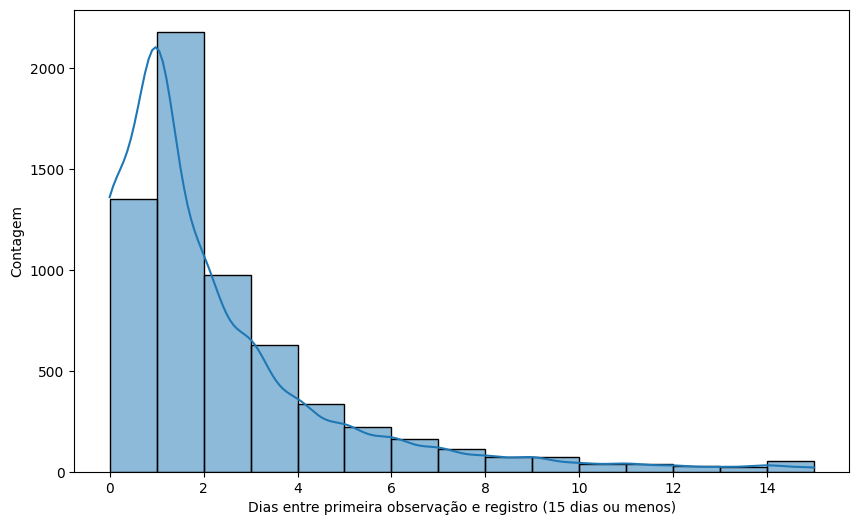

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(data=very_short_day_count_dif, binwidth=1, kde=True)
plt.xlabel("Dias entre primeira observação e registro (15 dias ou menos)")
plt.ylabel("Contagem")
plt.show()

É possível notar que a maioria dos acidentes são registrados nos 4 primeiros dias após as observações.

Para os acidentes registrados em menos de um dia, podemos observar a quantidade de horas que até o registro. Existem 1354 desses casos.

In [54]:
len(zero_day_count_dif)

1354

In [65]:
def hours(td):
    return round(td.seconds/3600, 2)

In [70]:
hours_count = []
for i in zero_day_count_dif:
  hours_count.append(hours(i))

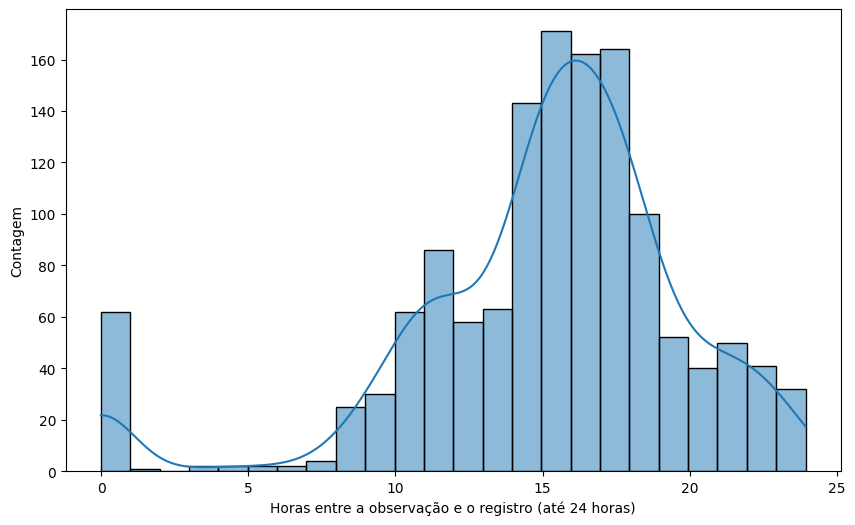

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(data=hours_count, binwidth=1, kde=True)
plt.xlabel("Horas entre a observação e o registro (até 24 horas)")
plt.ylabel("Contagem")
plt.show()

### Próximas análises

In [ ]:
bar_df = pd.DataFrame(df_acidentes['uf'].value_counts()).reset_index()
bar_df

,uf,count
0,MG,3474
1,SP,2462
2,RJ,2123
3,PR,643
4,BA,545
5,RS,509
6,SC,437
7,ES,416
8,SE,228
9,MS,216


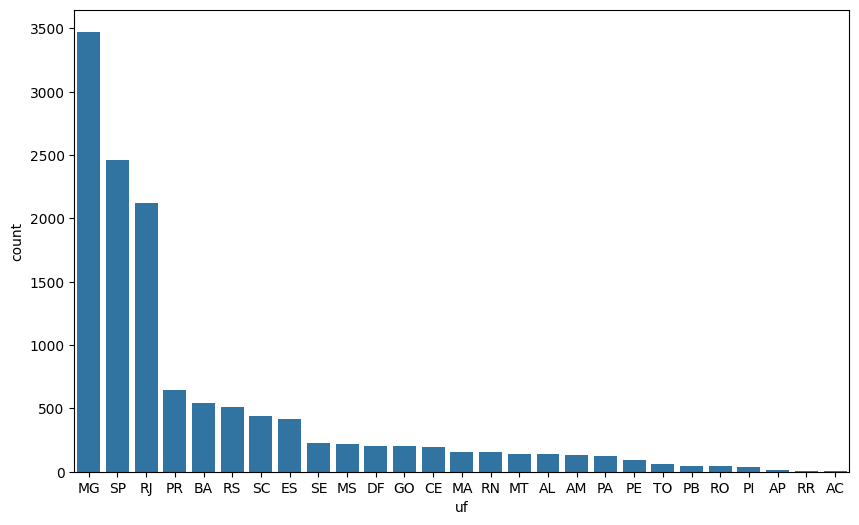

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(bar_df, x=bar_df['uf'], y=bar_df['count'])
plt.show()

In [ ]:
bar_df2 = pd.DataFrame(df_acidentes['registro_ano'].value_counts()).reset_index()
bar_df2

,registro_ano,count
0,2010,1378
1,2019,1270
2,2011,1213
3,2021,1097
4,2012,1091
5,2022,1062
6,2018,1056
7,2017,914
8,2020,894
9,2009,889


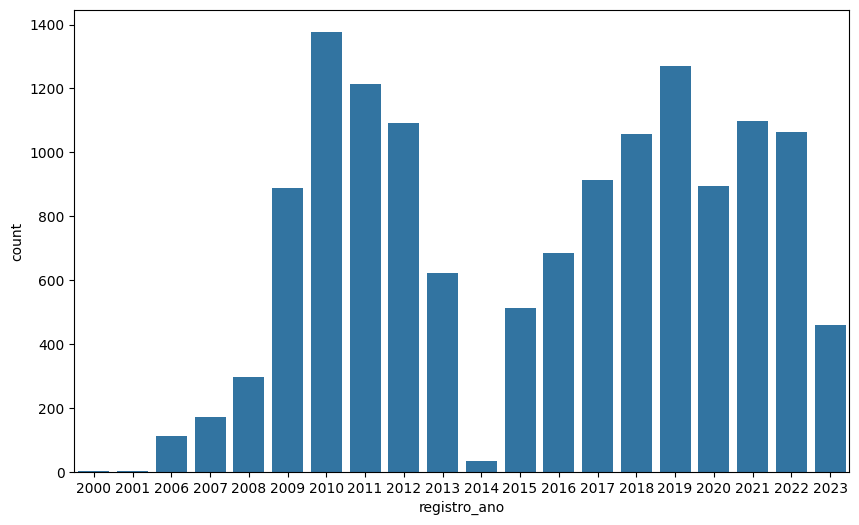

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(bar_df2, x=bar_df2['registro_ano'], y=bar_df2['count'])
plt.show()

In [ ]:
bar_df3 = pd.DataFrame(df_acidentes['ocorrencia_oleo'].value_counts()).reset_index()
bar_df3

,ocorrencia_oleo,count
0,N,10890
1,S,2865


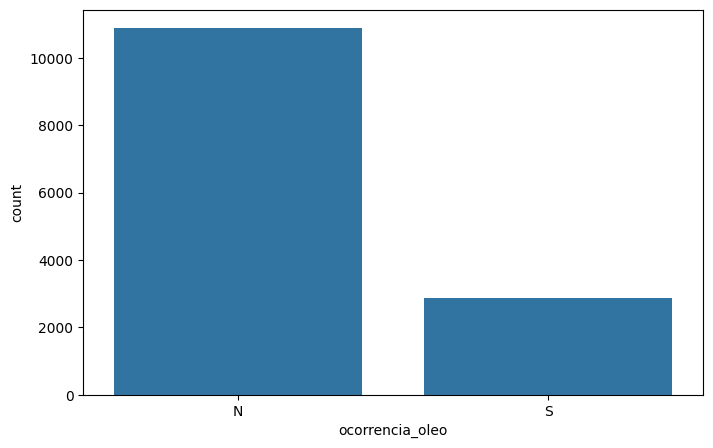

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.barplot(bar_df3, x=bar_df3['ocorrencia_oleo'], y=bar_df3['count'])
plt.show()

In [ ]:
df_acidentes.columns

Index(['dt_ocorrencia', 'hr_ocorrencia', 'dt_registro', 'plano_emergencia',
       'plano_emergencia_acionado', 'iniciados_outras_providencias',
       'ocorrencia_oleo', 'dt_primeira_obs', 'hr_primeira_obs',
       'informacao_responsavel', 'des_causa_provavel', 'endereco_ocorrencia',
       'legado', 'des_instituicao_empresa', 'validado', 'tipo_comunicado',
       'periodo_ocorrencia', 'periodo_primeira_obs', 'municipio', 'uf',
       'origem', 'tipo_evento', 'dt_ocorrencia_feriado',
       'institiuicoes_atuando_local', 'tipos_fontes_informacoes',
       'tipos_danos_identificados', 'geom', 'dt_ocorrencia_mod',
       'dt_registro_mod', 'dt_primeira_obs_mod', 'registro_ano',
       'hr_ocorrencia_mod'],
      dtype='object')

In [ ]:
df_acidentes['tipo_evento'].value_counts()

,count
tipo_evento,
Outro(s),6578
Derramamento de líquidos,4791
Lançamento de sólidos,993
Explosão/incêndio,270
Vazamento de gases,164
Explosão/incêndio;Outro(s),152
Derramamento de líquidos;Lançamento de sólidos,130
Derramamento de líquidos;Explosão/incêndio,98
Produtos químicos/embalagens abandonadas,70


In [ ]:
df_acidentes['tipos_danos_identificados'].value_counts()

,count
tipos_danos_identificados,
Mar,3263
Outro(s),3042
Solo,2296
Atmosfera,882
Rio/córrego,375
...,...
Outro(s);População afetada/evacuada;Rio/córrego;Solo,1
Fauna;Flora;Mar;Outro(s);População afetada/evacuada;Praia,1
Fauna;Flora;Óbitos/feridos;Rio/córrego;Solo,1
